# Module 12 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [73]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
#Run an auto google chrome
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

#Visit the url
browser.visit(url)

#Set html as the url website
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
soup = BeautifulSoup(html,"html.parser")

In [5]:
# Extract all rows of data
all_data = soup.find_all('tr',class_='data-row')

#Prints the text in each row
for row in all_data:
    print(row.text)


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181
2012-09-15
39
171
6
-75.0
751.0


182
2012-09-16
40
17

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
#Create a list to hold the table data
table_list = []
# Extract all rows of data

#Grabs the whole table
table = soup.find('table',class_='table')

#Grab the column names 
column_names = table.find('tr')

#create a list to store all the column names
column_names_list = []

#Separate out each column name
for row in column_names:
    if row.text != '\n':
        column_names_list.append(row.text)

#column_names_list

#Creates list for each column name to store their respective data values
id_list =[]
date_list = []
sol_list = []
ls_list = []
month_list =[]
min_list = []
pressure_list = []

#Grabbing the actual rows of data 
row_data = table.find_all('tr',class_='data-row')

#Go through each row of data and append each value to their respective column name list
for row in row_data:
    id_list.append(row.find_all('td')[0].text)
    date_list.append(row.find_all('td')[1].text)
    sol_list.append(row.find_all('td')[2].text)
    ls_list.append(row.find_all('td')[3].text)
    month_list.append(row.find_all('td')[4].text)
    min_list.append(row.find_all('td')[5].text)
    pressure_list.append(row.find_all('td')[6].text)


In [24]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names

#Create the PD data frame 
data_dict = {'id':id_list, 'terrestrial_date':date_list,
     'sol':sol_list,'ls':ls_list,'month':month_list,
     'min_temp':min_list,'pressure':pressure_list}

mars_df = pd.DataFrame(data_dict)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [25]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

mars_df = mars_df.astype({'sol':'int64','ls':'int64',
                          'month':'int64','min_temp':'float64',
                          'pressure':'float64'})

In [12]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [86]:
# 1. How many months are there on Mars?
#Group by then reset index, and only display month and id columns
month_mars = mars_df.groupby('month').count().reset_index()[['month','id']]
#Change id column name to count 
month_mars = month_mars.rename(columns = {'id':"count"})

month_mars

,month,count
0,1,174
1,2,178
2,3,192
3,4,194
4,5,149
5,6,147
6,7,142
7,8,141
8,9,134
9,10,112


In [79]:
# 2. How many Martian days' worth of data are there?

# find the amount of rows in dates that unique 
print(len(mars_df['terrestrial_date']))

1867


In [43]:
# 3. What is the average low temperature by month?

#Group by month then average the min temperature for each month then display only month and min temp
month_temp = mars_df.groupby('month').mean('min_temp')['min_temp']

month_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

<Axes: xlabel='month', ylabel='Tempearture in celcius'>

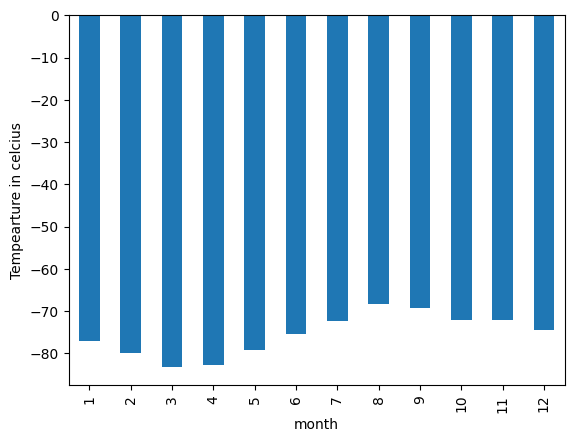

In [45]:
# Plot the average temperature by month
month_temp.plot(kind='bar',ylabel='Tempearture in celcius')

<Axes: xlabel='month', ylabel='Tempearture in celcius'>

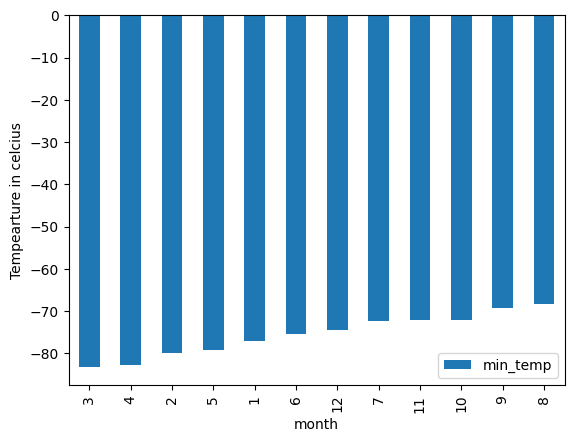

In [56]:
#Plot the graph sorted by min tempearture 
month_temp.reset_index().sort_values('min_temp').plot(kind='bar',x='month',ylabel='Tempearture in celcius')

In [59]:
# 4. Average pressure by Martian month
mars_pressure = mars_df.groupby('month').mean('pressure')['pressure']

mars_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

<Axes: xlabel='month', ylabel='Pressure'>

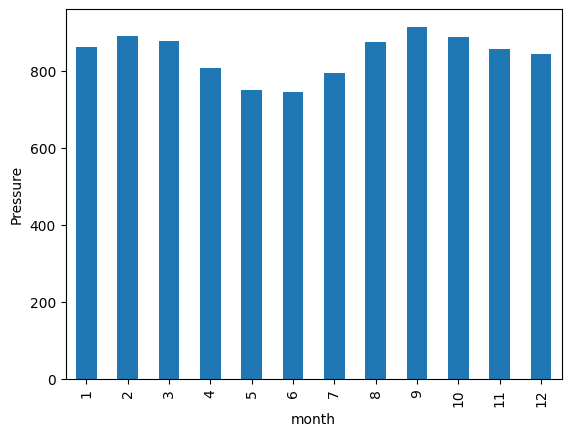

In [61]:
# Plot the average pressure by month
mars_pressure.plot(kind='bar',ylabel='Pressure')

In [67]:
#Filter for ls to be 155, and examine the dates to determine the amount of earth days for a year on mars. 
mars_df.loc[mars_df['ls']==155]


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


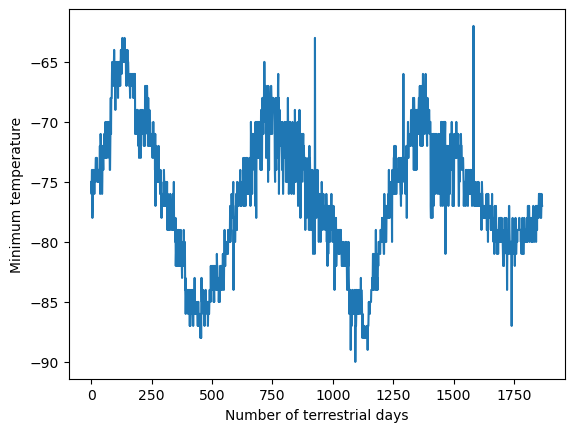

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df[['sol','min_temp']].plot(kind='line',x='sol',y='min_temp')

On average, the third month has the coldest minimum temperature on Mars at -83.307292 celcius, and the eighth month is the warmest at -68.382979 celcius.



Atmospheric pressure is, on average, lowest in the sixth month (745.054422 pressure) and highest in the ninth (913.305970 pressure).

Visually on the graph we can estimate the amount of days on mars to complete a full rotation around the sun to be around 620-680 days. 

We can also find rough estimate by looking into the earth dates where the solar latitude of mars are similar or the same. For example a solar latitude gives us 155 gives us 5 different dates and using the "sol" values we can determine it takes about 678 days for mars to complete a full cycle around the sun.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [76]:
# Write the data to a CSV

#Creates resource file if it does not exist
outdir = "./Resources"
if not os.path.exists(outdir):
    os.mkdir(outdir)

path = os.path.join(outdir,'mars_temp')

mars_df.to_csv(path,index=False)

In [77]:
browser.quit()